## 감정 점수 계산 및 시각화

### 데이터 로드 및 초기 처리
- `naver_news_crawling_data_with_sentiment.csv` 뉴스 감정데이터 Read
- `pub_date`를 `datetime`의 형식으로 변환 
- 뉴스 데이터가 적은 2024-11-03의 데이터를 제거하여 분석에서 제외

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
dataset = pd.read_csv('../data/naver_news_crawling_data_with_sentiment.csv', header=0)

# 'pub_date' 컬럼을 datetime 형식으로 변환
dataset['pub_date'] = pd.to_datetime(dataset['pub_date'], errors='coerce')

# 특정 날짜 데이터 제거
dataset = dataset[dataset['pub_date'].dt.date != pd.to_datetime('2024-11-03').date()]

# 데이터 확인
dataset.head()

,pub_date,description,sentiment
0,2024-11-04 09:00:00,코스피 시가총액 상위 10개 종목 중에서는 <SK하이닉스>000660 121 삼성전...,1
1,2024-11-04 09:00:00,시가총액 상위 종목 중 삼성전자137 <SK하이닉스>170 등 반도체주와 현대차16...,0
2,2024-11-04 09:00:00,KB증권은 지난 달 23일부터 AI 실적속보를 통해 삼성전자 <SK하이닉스> 현대차...,0
3,2024-11-04 09:00:00,KB증권은 지난달 23일부터 AI 실적속보를 통해 삼성전자 <SK하이닉스> 현대차 ...,0
4,2024-11-04 09:00:00,KB증권은 지난 달 23일부터 AI 실적속보를 통해 삼성전자 <SK하이닉스> 현대차...,0


---
### 날짜 및 시간 추출
- `pub_date`에서 날짜 정보를 추출하여 `day` 컬럼 생성


In [22]:
# 날짜(day) 추출
dataset['day'] = dataset['pub_date'].dt.date

# 데이터 확인
dataset[['pub_date', 'day']].head()

,pub_date,day
0,2024-11-04 09:00:00,2024-11-04
1,2024-11-04 09:00:00,2024-11-04
2,2024-11-04 09:00:00,2024-11-04
3,2024-11-04 09:00:00,2024-11-04
4,2024-11-04 09:00:00,2024-11-04


---
### 감정 점수 변환
- 감정 레이블을 점수로 매핑
  - 긍정(1) → +1
  - 부정(2) → -1
  - 중립(0) → 0

In [23]:
# 감정 레이블 점수 매핑 및 변환
emotion_mapping = {0: 0, 1: 1, 2: -1}
dataset['sentiment_score'] = dataset['sentiment'].map(emotion_mapping)

# 데이터 확인
dataset[['sentiment', 'sentiment_score']].head()

,sentiment,sentiment_score
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


---
### 날짜 단위로 그룹화
- `day` 기준으로 데이터를 그룹화하여 감정 점수 합산

In [24]:
# 날짜 단위로 그룹화하여 감정 점수 합산
emotion_scores_by_day = dataset.groupby('day')['sentiment_score'].sum().reset_index()

# 데이터 확인
emotion_scores_by_day.head()

,day,sentiment_score
0,2024-11-04,378
1,2024-11-05,55
2,2024-11-06,41
3,2024-11-07,-46
4,2024-11-08,35


---
### 감정 점수 시각화 및 csv저장
- 날짜별 감정 점수를 라인 그래프로 시각화합니다.
- x축(날짜)은 45도 회전하여 가독성을 높입니다.

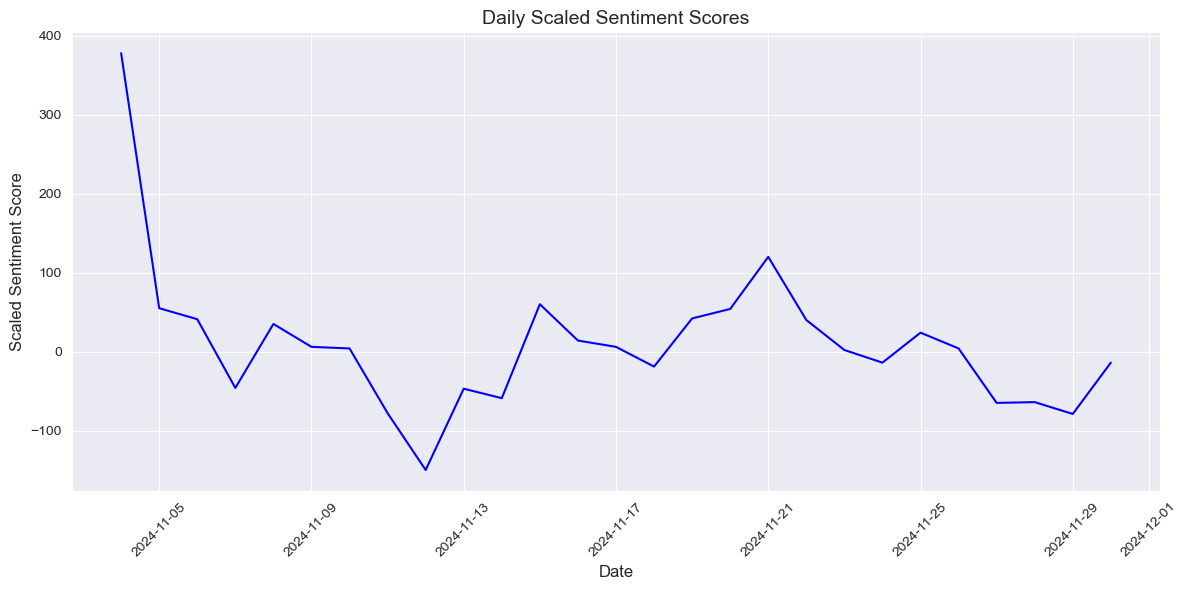

In [25]:
# 결과를 CSV로 저장
emotion_scores_by_day.to_csv('../data/sentiment_scores_by_day.csv', index=False)

# 시각화: 하루 단위 감정 점수
plt.figure(figsize=(12, 6))
plt.plot(emotion_scores_by_day['day'], emotion_scores_by_day['sentiment_score'], label='Sentiment Score', color='blue')

# 그래프 제목 및 레이블
plt.title('Daily Scaled Sentiment Scores', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Scaled Sentiment Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()